## Auto Encoders

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split

2024-11-28 20:20:35.022919: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-28 20:20:35.116950: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-28 20:20:35.198883: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732805435.278493   23427 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732805435.300789   23427 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-28 20:20:35.484169: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
# Loading the dataset
iris = datasets.load_iris()

X = iris.data
y = iris.target
print("X:",X[0])
target_names = iris.target_names


# Scaling the data
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

X: [5.1 3.5 1.4 0.2]


In [3]:
# Function for plotting the graphs

def plot3clusters(X, title, vtitle):
    plt.figure()
    colors = ['navy','turquoise','darkorange']
    for color, i, target_name in zip(colors, [0,1,2], target_names):
        plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target_name)
        plt.legend(loc='upper left')
        plt.title(title)
        plt.xlabel(vtitle + "1")
        plt.ylabel(vtitle + "2")
        plt.show()

2024-11-28 20:20:37.332344: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


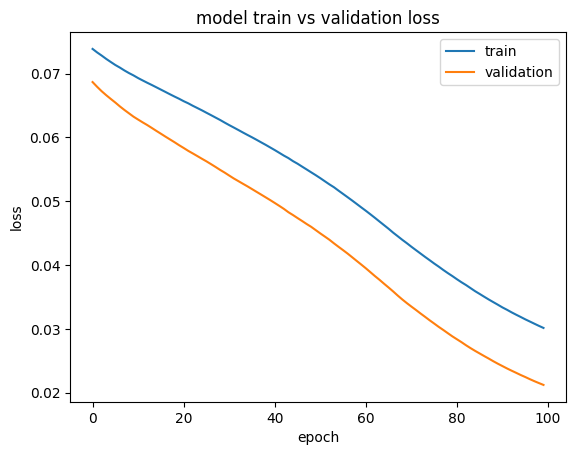

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


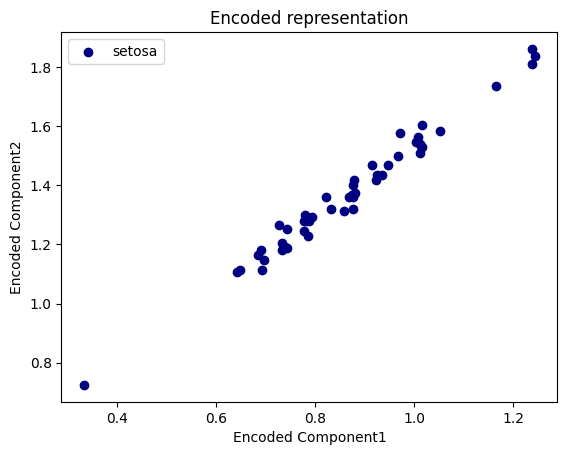

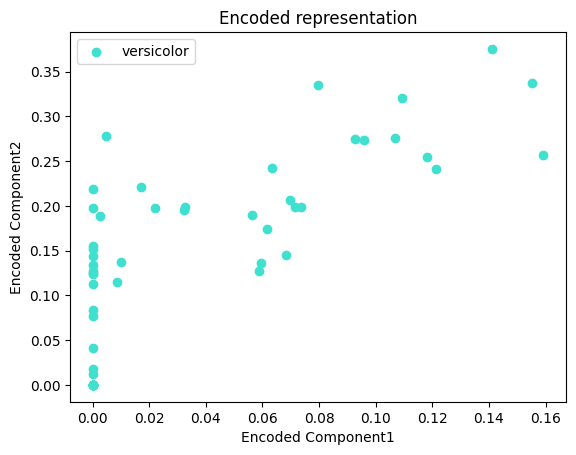

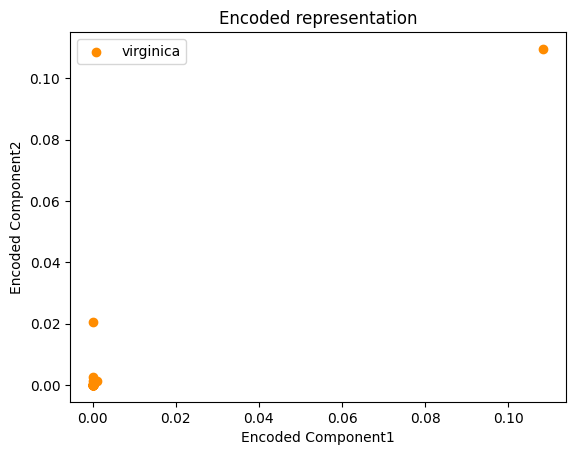

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Building the autoencoder
input_dim = X_train.shape[1]
encoding_dim = 2  # Dimension of the encoded representation

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Map an input to reconstruction                                                                                                        
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

history = autoencoder.fit(
    X_train, X_train,
    epochs=100,
    batch_size=16,
    validation_data=(X_test, X_test),
    verbose=0
)


# Plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper right')
plt.show()


# Use the encoded layer to encode the training input
encoder = Model(input_layer, encoded)

# Encode the data
X_encoded = encoder.predict(X_scaled)

# Visualize the encoded representation with PCA
plot3clusters(X_encoded, "Encoded representation", "Encoded Component")